In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
#  데이터 준비 

from sklearn.datasets import load_digits

digits_dataset = load_digits()

In [9]:
print( digits_dataset['data'].shape )
np.unique(digits_dataset['target'])

(1797, 64)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

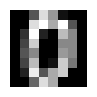

In [7]:
plt.figure(figsize=(1, 1))
plt.imshow(digits_dataset['data'][0].reshape((8, 8)), cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# 위의 데이터를 사용해서 (분류)예측 모델 개발

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
# 데이터 준비
X = digits_dataset['data']
y = digits_dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [ ]:
# 모델 훈련(학습)
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(1.0, 0.96)

In [20]:
scores = []
for c in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]:
    logreg = LogisticRegression(C=c, max_iter=10000)
    logreg.fit(X_train, y_train)

    scores.append((c, 
                   logreg.score(X_train, y_train), 
                   logreg.score(X_test, y_test)))

In [21]:
scores

[(0.0001, 0.9368968077208611, 0.92),
 (0.001, 0.9703043801039347, 0.9577777777777777),
 (0.01, 0.9970304380103935, 0.9688888888888889),
 (0.1, 1.0, 0.9644444444444444),
 (1, 1.0, 0.96),
 (10, 1.0, 0.96),
 (100, 1.0, 0.9577777777777777)]

In [ ]:
# star-dataset.csv 데이터를 활용해서 예측 모델 만들기
# --> target : "Star Type" 컬럼

# 1. 데이터프레임으로 데이터 읽기
# 2-1. "Star Color", "Spectral Class" 컬럼을 OneHotEncoder를 사용해서 수치화
# 2-2. "Star Color", "Spectral Class" 컬럼을 제거
# 3. X, y 만들기
# 4. 예측 모델 만들기
# 5. 평가

In [24]:
star_df = pd.read_csv('data-files/star-dataset.csv')
star_df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


Index(['Star color', 'Spectral Class'], dtype='object')

In [ ]:
# 수치형이 아닌 컬럼을 제거
print( star_df.columns[-2:] )
star_df2 = star_df.drop(star_df.columns[-2:], axis=1)
star_df2.head()

Index(['Star color', 'Spectral Class'], dtype='object')


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
0,3068,0.002400,0.1700,16.12,0
1,3042,0.000500,0.1542,16.60,0
2,2600,0.000300,0.1020,18.70,0
3,2800,0.000200,0.1600,16.65,0
4,1939,0.000138,0.1030,20.06,0


In [47]:
# 수치형 컬럼을 one hot encoding
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
# print( ohe.fit_transform(star_df[star_df.columns[-2:]]) ) # sparse matrix
ohe_values = ohe.fit_transform(star_df[star_df.columns[-2:]]).toarray()  # dense matrix

star_df3 = \
    pd.concat((star_df[star_df.columns[:-2]], pd.DataFrame(ohe_values)), axis=1)

In [54]:
star_df4 = pd.get_dummies(star_df)

In [55]:
# X = star_df2.drop("Star type", axis=1).values
# y = star_df2['Star type'].values
# X = star_df3.drop("Star type", axis=1).values
# y = star_df3['Star type'].values
X = star_df4.drop("Star type", axis=1).values
y = star_df4['Star type'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.8166666666666667, 0.7)

In [57]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000, solver="lbfgs")
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(0.9888888888888889, 0.9833333333333333)